In [ ]:
#importando as bibliotecas
import pandas as pd  #biblioteca utilizada para criar os dataframes
import numpy as np  #biblioteca utilizada para trabalhar com vetores ou matrizes
import matplotlib.pyplot as plt #biblioteca utilizada para construção de gráficos
from sklearn.cluster import KMeans #biblioteca utilizada para a construção K-means
from sklearn.decomposition import PCA #biblioteca utilizada para a construção do PCA
from sklearn.preprocessing import StandardScaler #biblioteca utilizada para a normalização dos dados
import seaborn as sns #biblioteca utilizada para o plot dos gráficos de forma mais "bonita"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#importando o banco de dados a ser utilizado (comando necessário para o google colab)
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv


In [ ]:
#upload do dataset
df_carros = pd.read_csv('cars.csv')

In [ ]:
#mostrando as 5 primeiras linhas do dataset
df_carros.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [ ]:
#encontrando as características do dataset
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [ ]:
#encontrando as colunas
df_carros.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [ ]:
#copiando o dataset para responder quais eram os valores
df_carros_copia=df_carros.copy()

In [ ]:
#pegando apenas os dados numéricos
df_carros=df_carros[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year']]

In [ ]:
#verificando as mudanças
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 14.4+ KB


In [ ]:
#transformando os dados para numéricos
df_carros['cubicinches']=pd.to_numeric(df_carros['cubicinches'], errors='coerce')
df_carros['weightlbs']=pd.to_numeric(df_carros['weightlbs'], errors='coerce')

In [ ]:
#verificando as mudanças
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 14.4 KB


In [ ]:
#identificando os valores que forçaram o pandas a identificar as variáveis como nulas
df_carros_copia[df_carros['cubicinches'].isnull()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,,105,3897,19,1976,US.
180,19.8,6,,85,2990,18,1980,US.


In [ ]:
df_carros_copia[df_carros['weightlbs'].isnull()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
14,19.1,6,225,90,,19,1981,US.
33,21.0,6,199,90,,15,1971,US.
172,29.0,4,68,49,,20,1974,Europe.


In [ ]:
#verificando a existencia de valroes nulos
df_carros.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
dtype: int64

In [ ]:
df_carros.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,259.000000,261.000000,258.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,109.258305,40.499959,854.039019,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,99.500000,75.000000,2248.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2867.500000,16.000000,1977.000000
75%,28.800000,8.000000,303.000000,138.000000,3670.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [ ]:
#retirando as linhas com dados NaN
valores = {'cubicinches': df_carros['cubicinches'].mean(), 'weightlbs': df_carros['weightlbs'].mean()}
df_carros=df_carros.fillna(value=valores)

In [ ]:
df_carros.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
dtype: int64

In [ ]:
#novo valor da média para a coluna 
df_carros.weightlbs.mean()

3009.8333333333335

In [ ]:
#encontrando o valor da mediana para a variável "mpg"
df_carros.mpg.median()

22.0

In [ ]:
#encontra o número de linhas e colunas dos dados
df_carros.shape

(261, 7)

In [ ]:
#verificando a existencia de valroes nulos
df_carros.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
dtype: int64

**Conhecendo o dataset**

In [ ]:
#encontrando as "estatísticas" do dataset
df_carros.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


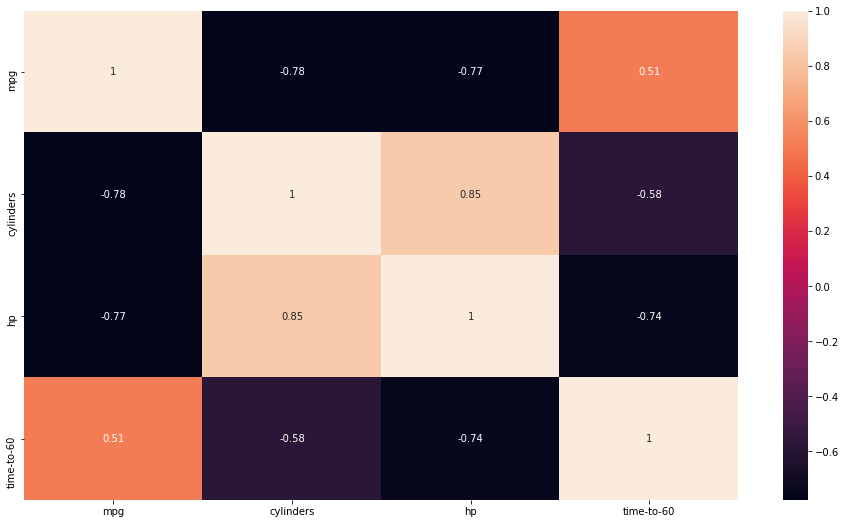

In [ ]:
#encontrando a matriz de correlação entre alguns dados
plt.rcParams["figure.figsize"] = [16, 9]
matriz_correlacao=df_carros[['mpg','cylinders','hp','time-to-60']].corr()
sns.heatmap(matriz_correlacao, annot=True)  #realiza o plot da matriz de correlação
plt.show()

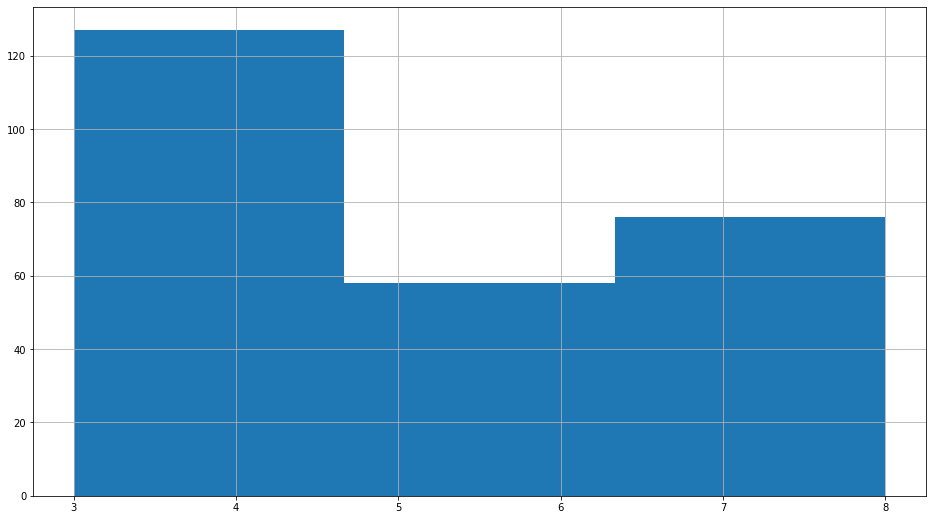

In [ ]:
#plotando alguns gráficos
df_carros['cylinders'].hist(bins=3);  #histograma

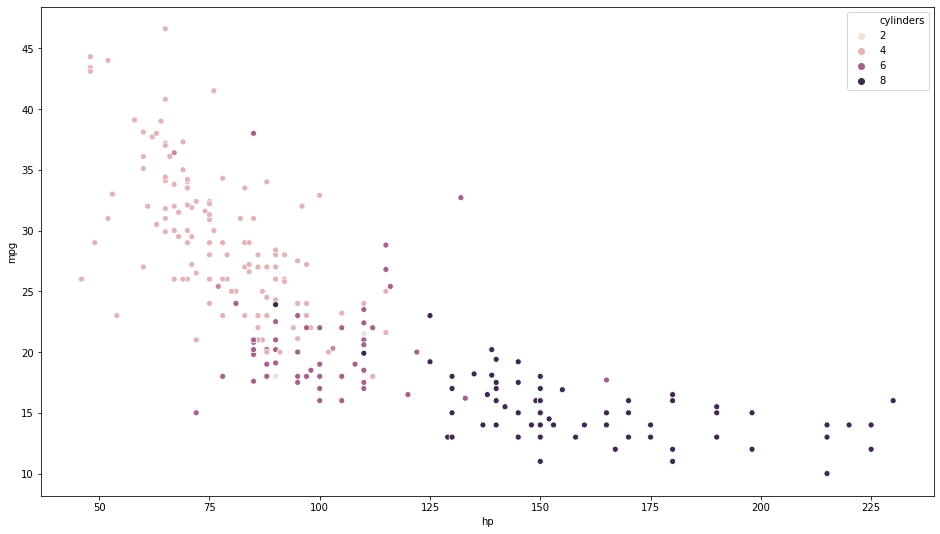

In [ ]:
#plotando o scatterplot
cmap = sns.cubehelix_palette(dark=.2, light=.9, as_cmap=True) #definindo as cores para serem utilizadas
sns.scatterplot(x="hp", y="mpg", hue="cylinders", data=df_carros, palette=cmap); # realizando o plot do gráfico

In [ ]:
df_carros[['hp']].median()

hp    95.0
dtype: float64

**Identificando possíveis outliers**

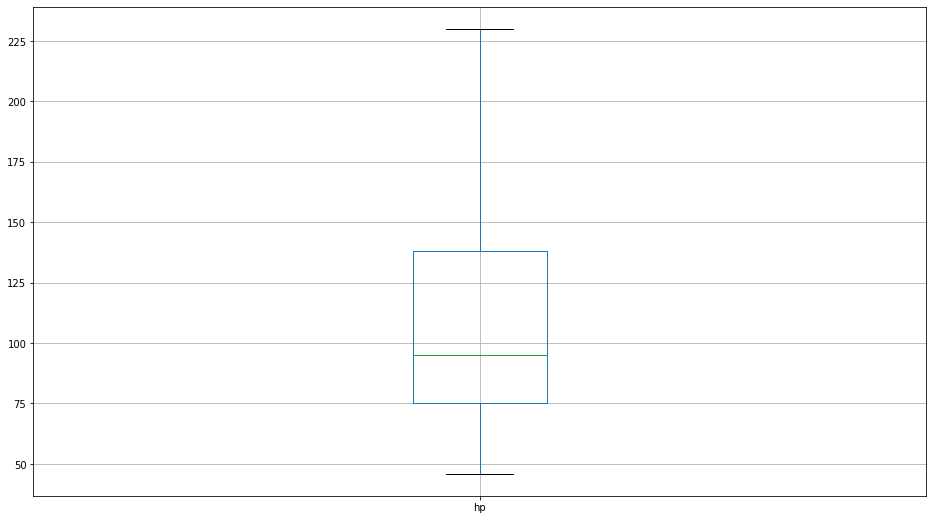

In [ ]:
#realizando o plot do boxplot
df_carros[['hp']].boxplot()

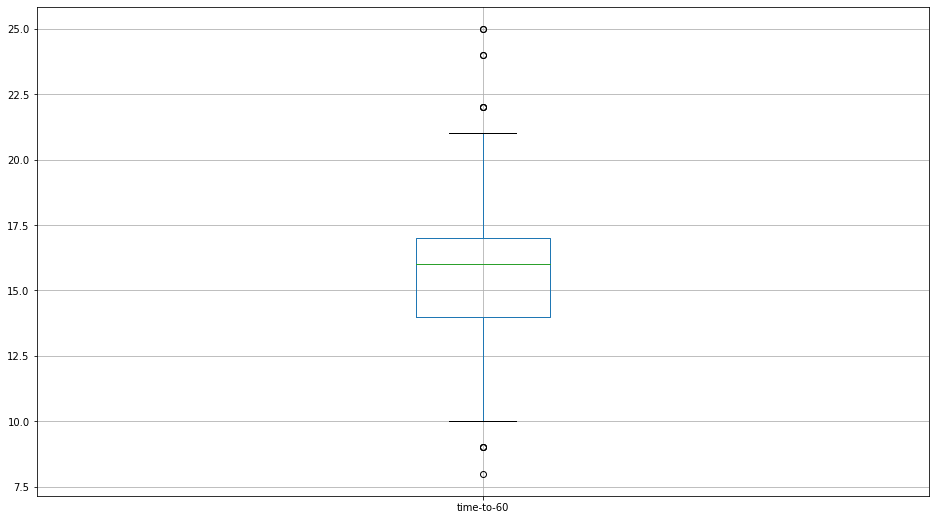

In [ ]:
df_carros[['time-to-60']].boxplot()

**Inicalizando o PCA**

In [ ]:
#Normalização com média 0 e desvio 1
normaliza = StandardScaler() #objeto para a normalização
X_std=normaliza.fit_transform(df_carros) #aplica a normalização

In [ ]:
X_std

array([[-1.17112732,  1.39305285,  1.37239295, ...,  1.41499703,
        -1.22128734, -1.32753906],
       [ 1.12122635, -0.91910482, -1.03028992, ..., -1.28008557,
        -0.53282946,  0.8758803 ],
       [-0.78693397,  1.39305285,  0.93052024, ...,  0.51820947,
        -1.56551627, -1.60296648],
       ...,
       [-0.14661172,  0.23697401,  0.28612253, ..., -0.20630047,
        -0.18860053,  1.70216257],
       [-0.65886952,  0.23697401,  0.28612253, ...,  0.32823211,
         0.15562841, -1.32753906],
       [-0.14661172,  0.23697401,  0.4518248 , ...,  0.40493105,
        -0.18860053,  0.04959804]])

In [ ]:
df_carros.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year'],
      dtype='object')

In [ ]:
#Normalização com média 0 e desvio 1
normaliza = StandardScaler() #objeto para a normalização
hp=normaliza.fit_transform((df_carros['cylinders'].values).reshape(-1,1)) #aplica a normalização

In [ ]:
hp.max()

1.393052850675895

In [ ]:
#inicalizando o objeto PCA
pca = PCA(n_components=7)  #instancia o objeto
principalComponents = pca.fit_transform(X_std) #aplica a identificação do pca

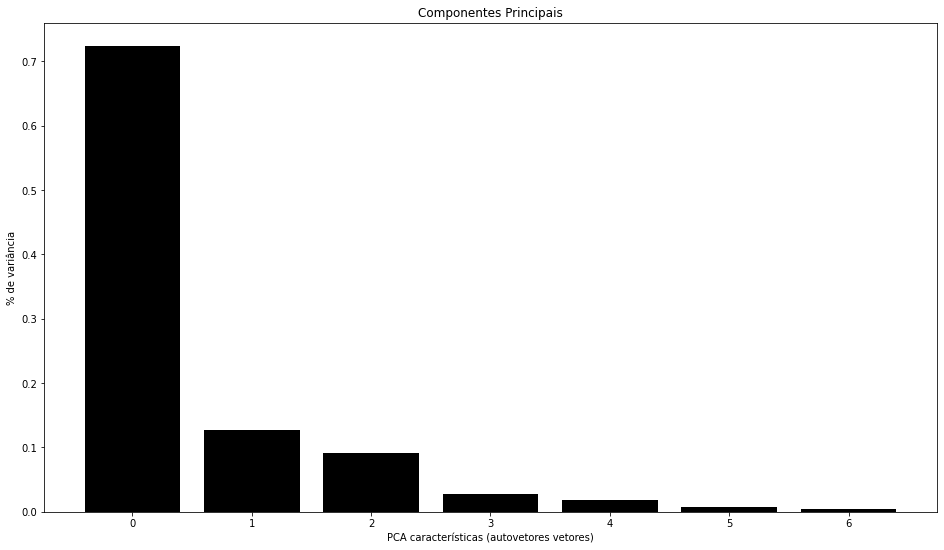

In [ ]:
#plot das componentes principais
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black');
plt.xlabel('PCA características (autovetores vetores)')
plt.ylabel('% de variância')
plt.title("Componentes Principais")
plt.xticks(features);

In [ ]:
#valor da primeira componente principal
pca.explained_variance_ratio_[1]

0.12675138457359814

Text(0.5, 1.0, 'Componentes Principais - Acumulada')

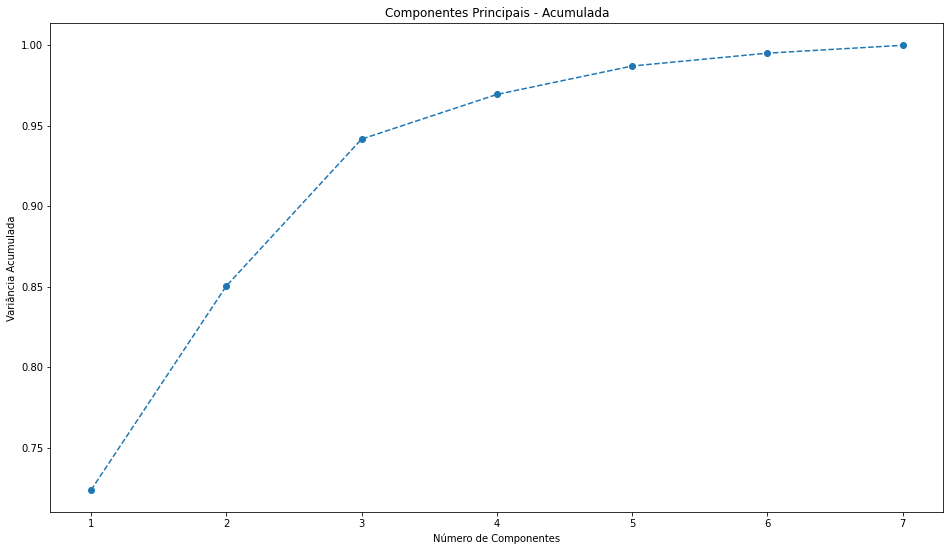

In [ ]:

#plot cumulativo das variâncias explicadas
pca.explained_variance_ratio_

plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--') #plot dos valores acumulados para os dados
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title("Componentes Principais - Acumulada")

In [ ]:
#criando o dataset com as componentes
PCA_components = pd.DataFrame(principalComponents)

In [ ]:
PCA_components.head(10)

,0,1,2,3,4,5,6
0,3.485219,0.526326,-0.139738,0.258792,0.086902,-0.179206,0.079078
1,-2.176912,-0.285424,-1.304613,-0.100465,-0.289698,-0.041147,-0.013127
2,2.684973,1.046946,-0.732156,0.498227,-0.535168,-0.075745,0.159956
3,3.534648,0.847619,-0.801334,0.506630,-0.435696,-0.144237,-0.483162
4,-2.299222,0.194808,-0.221704,0.079650,-0.175655,0.015566,-0.069958
5,1.449778,-1.588722,0.950710,0.742082,-0.196737,0.097858,-0.169286
6,3.314567,0.009404,0.241777,0.027594,0.022258,-0.207515,0.045707
7,4.793378,0.531764,-1.124946,0.479539,0.736392,0.126695,-0.277913
8,-1.050627,-0.883101,1.452750,-0.074926,0.218011,-0.436406,-0.096664
9,-2.946682,-0.974459,-0.558787,0.448091,-0.031856,-0.081806,0.004353


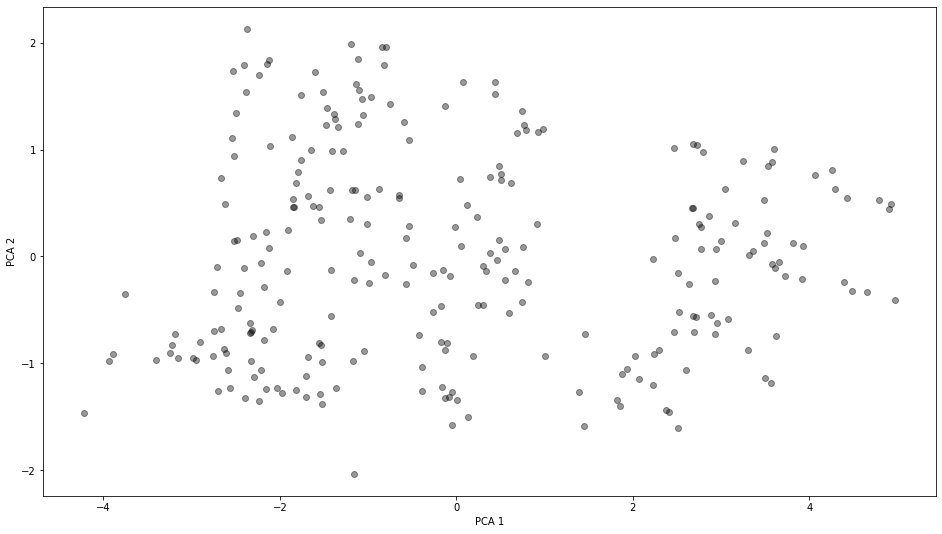

In [ ]:
#realizando o plot em duas dimensões (componentes 1 e 2 )
plt.scatter(PCA_components[0], PCA_components[1], alpha=.4, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2');

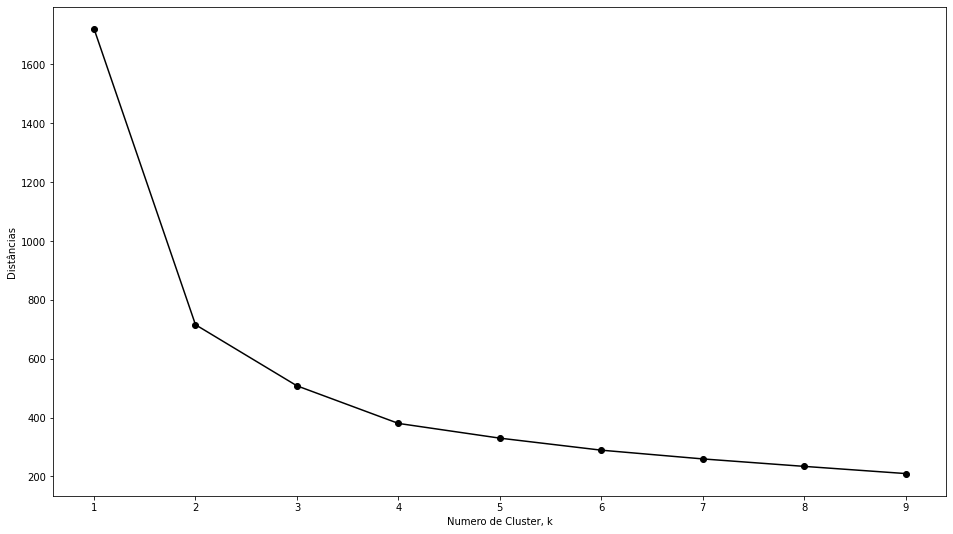

In [ ]:
#aplicando o curva do cootovelo para encontrar o número de clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Cria o obeto para modelo kmens para os testes
    model = KMeans(n_clusters=k)
    
    # Aplica nas componentes selecionadas (3 componentes)
    model.fit(PCA_components.iloc[:,:3])
    
    # Adiciona os valores para a distância (agitação)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('Numero de Cluster, k')
plt.ylabel('Distâncias')
plt.xticks(ks)
plt.show()

In [ ]:
#---------------------------------------------------------------------------
# implementando o K-means com 3 clusters 
#---------------------------------------------------------------------------
k_means_pca=KMeans(n_clusters=3,random_state=42)
k_means_pca.fit(PCA_components.iloc[:,:3])


#df com os dados iniciais e de cada uma das componentes
df_segment_pca_kmeans=pd.concat([df_carros.reset_index(drop=True),PCA_components.iloc[:,:3]],axis=1)
df_segment_pca_kmeans.columns.values[-3:]=['Componente 1','Componente 2','Componente 3']
df_segment_pca_kmeans['Seguimento no Kmeans']=k_means_pca.labels_


df_segment_pca_kmeans.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,Componente 1,Componente 2,Componente 3,Seguimento no Kmeans
0,14.0,8,350.0,165,4209.0,12,1972,3.485219,0.526326,-0.139738,1
1,31.9,4,89.0,71,1925.0,14,1980,-2.176912,-0.285424,-1.304613,0
2,17.0,8,302.0,140,3449.0,11,1971,2.684973,1.046946,-0.732156,1
3,15.0,8,400.0,150,3761.0,10,1971,3.534648,0.847619,-0.801334,1
4,30.5,4,98.0,63,2051.0,17,1978,-2.299222,0.194808,-0.221704,0


In [ ]:
#adicionando um dicionário para cada um dos seguimentos
df_segment_pca_kmeans['Cluster']=df_segment_pca_kmeans['Seguimento no Kmeans'].map({0:'C1',
                     1:'C2',
                     2:'C3'})


In [ ]:
df_segment_pca_kmeans.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,Componente 1,Componente 2,Componente 3,Seguimento no Kmeans,Cluster
0,14.0,8,350.0,165,4209.0,12,1972,3.485219,0.526326,-0.139738,1,C2
1,31.9,4,89.0,71,1925.0,14,1980,-2.176912,-0.285424,-1.304613,0,C1
2,17.0,8,302.0,140,3449.0,11,1971,2.684973,1.046946,-0.732156,1,C2
3,15.0,8,400.0,150,3761.0,10,1971,3.534648,0.847619,-0.801334,1,C2
4,30.5,4,98.0,63,2051.0,17,1978,-2.299222,0.194808,-0.221704,0,C1


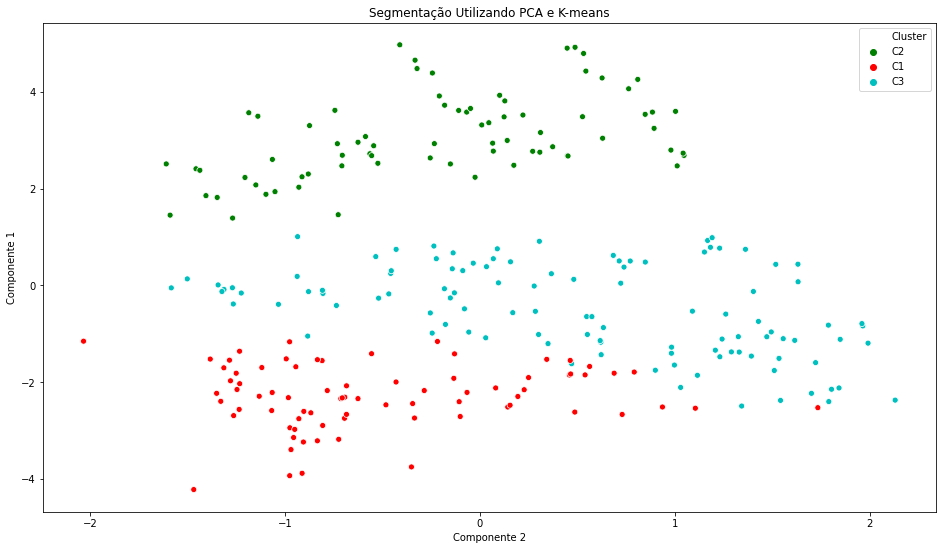

In [ ]:
#plotando os resultados
x_axis=df_segment_pca_kmeans['Componente 2']
y_axis=df_segment_pca_kmeans['Componente 1']
sns.scatterplot(x_axis,y_axis,hue=df_segment_pca_kmeans['Cluster'],palette=['g','r','c'])
plt.title('Segmentação Utilizando PCA e K-means')
plt.show()

In [ ]:
#contando a quantidade de instâncias em cada um dos grupos
df_segment_pca_kmeans.groupby(by='Cluster').count()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,Componente 1,Componente 2,Componente 3,Seguimento no Kmeans
Cluster,,,,,,,,,,,
C1,77,77,77,77,77,77,77,77,77,77,77
C2,75,75,75,75,75,75,75,75,75,75,75
C3,109,109,109,109,109,109,109,109,109,109,109


**Árvore de Decisão**

In [ ]:
#importando as bibliotecas
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
from sklearn import metrics #importa as métricas para avaliação

In [ ]:
#preparando o dataset
#df_carros_arvore=pd.read_csv('cars.csv')

In [ ]:
#transformando os dados para numéricos
#df_carros_arvore['cubicinches']=pd.to_numeric(df_carros_arvore['cubicinches'], errors='coerce')
#df_carros_arvore['weightlbs']=pd.to_numeric(df_carros_arvore['weightlbs'], errors='coerce')

In [ ]:
#retirando os valores nulos
df_carros_arvore=df_carros.copy()#.dropna(inplace=True)

In [ ]:
#mostrando o dataset
df_carros_arvore.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [ ]:
#adicionando a coluna de classificação
df_carros_arvore['is_efficient']=df_carros_arvore['mpg'].map(lambda x: 1 if x>25 else 0)

In [ ]:
df_carros_arvore.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,is_efficient
0,14.0,8,350.0,165,4209.0,12,1972,0
1,31.9,4,89.0,71,1925.0,14,1980,1
2,17.0,8,302.0,140,3449.0,11,1971,0
3,15.0,8,400.0,150,3761.0,10,1971,0
4,30.5,4,98.0,63,2051.0,17,1978,1


In [ ]:
df_carros_arvore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1   cylinders     261 non-null    int64  
 2   cubicinches   261 non-null    float64
 3   hp            261 non-null    int64  
 4   weightlbs     261 non-null    float64
 5   time-to-60    261 non-null    int64  
 6   year          261 non-null    int64  
 7   is_efficient  261 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 16.4 KB


In [ ]:
#definindo as entradas e as saídas
entradas_arvore=df_carros_arvore[['cylinders'	,'cubicinches'	,'hp'	,'weightlbs'	,'time-to-60']]
saidas_arvore=df_carros_arvore['is_efficient']

In [ ]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(entradas_arvore, saidas_arvore, test_size=0.30,random_state=42)# divide 30% para teste

In [ ]:
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier(random_state=42)

# Realiza o treinamento do classificador
clf = clf.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

In [ ]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  8]
 [ 2 36]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.82      0.95      0.88        38

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.88      0.87      0.87        79



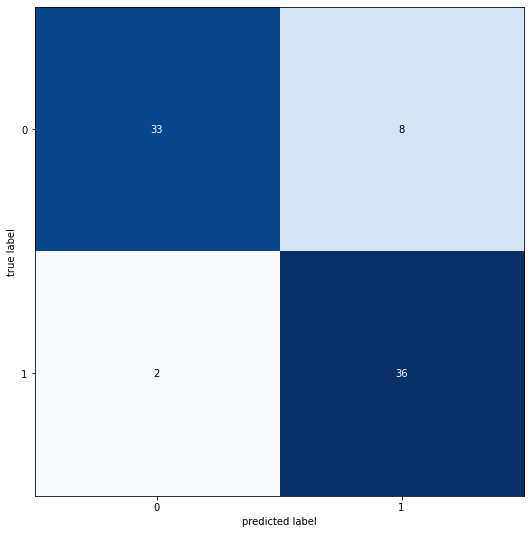

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
#aplicando a regressão logística
from sklearn.linear_model import LogisticRegression
clf_regressao = LogisticRegression(random_state=42)
clf_regressao.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Realiza a previsão de classificaçao 
y_pred_regressao = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_regressao))
print(classification_report(y_test, y_pred_regressao))

[[33  8]
 [ 2 36]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.82      0.95      0.88        38

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.88      0.87      0.87        79



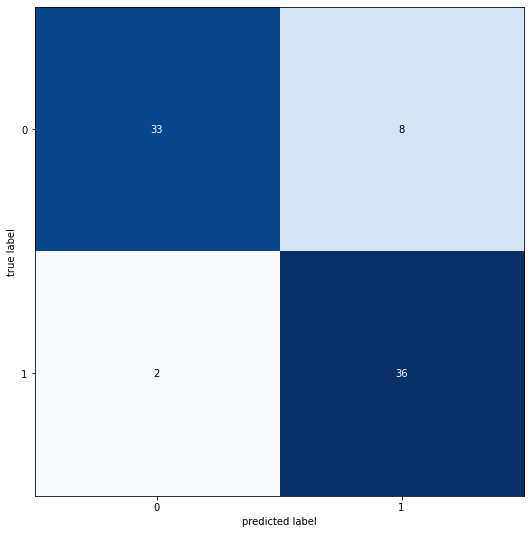

In [ ]:
matriz_confusao_reg = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_reg)
plt.show()
